# Life Expectancy Data Science Project

---------------------------------------------

### Introduction
This analysis explores a life expectancy dataset, aiming to uncover factors affecting life expectancy across countries over time. We'll handle missing values, engineer features, perform exploratory analysis, visualize patterns, and build a regression model to predict life expectancy.

### Objectives
- Understand the structure and quality of the dataset
- Identify key features affecting life expectancy
- Handle missing data appropriately
- Engineer new features to improve prediction
- Visualize relationships and trends
- Build a regression model to predict life expectancy
- Evaluate model performance using cross-validation
- Derive actionable insights

### Task 1: Explore Dataset and Missing Values

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats.mstats import winsorize
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
import warnings



In [80]:
df = pd.read_csv('Life_Expectancy_Data.csv')
df.shape 

(1649, 22)

In [81]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                      int64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                          int64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                                int64
Total expenditure                  float64
Diphtheria                           int64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [82]:
df.dtypes.value_counts()

float64    12
int64       8
object      2
Name: count, dtype: int64

In [83]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [84]:
for column in df.columns:
    df.rename(columns={column: column.strip()}, inplace=True)

df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [85]:
df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,16.7,102,66,9.20,66,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281,77,0.01,56.762217,63,2861,16.2,106,63,9.42,63,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287,80,0.03,25.873925,64,1599,15.7,110,64,8.33,64,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295,82,0.02,10.910156,63,1141,15.2,113,63,6.73,63,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295,84,0.03,17.171518,64,1990,14.7,116,58,7.43,58,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [86]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1644    False
1645    False
1646    False
1647    False
1648    False
Length: 1649, dtype: bool


In [87]:
#Find total of duplicated values
print(df.duplicated().sum())

0


In [88]:
# Get the number of unique countries from the 'Country' column
number_of_countries = df['Country'].nunique()

# Print the number of unique countries
print(f"The total number of unique countries in the dataset is: {number_of_countries}")

The total number of unique countries in the dataset is: 133


### Task 2: Handle Missing Data and Justify Method

In [89]:
null_values = df.isnull().sum()

In [90]:
#Checks if any column has NaN
df.isnull().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
BMI                                False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
Population                         False
thinness  1-19 years               False
thinness 5-9 years                 False
Income composition of resources    False
Schooling                          False
dtype: bool

In [91]:
#Checks if any row has NaN
df.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1644    False
1645    False
1646    False
1647    False
1648    False
Length: 1649, dtype: bool

In [92]:
#Checks if all values in a column are NaN
df.isnull().all()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
BMI                                False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
Population                         False
thinness  1-19 years               False
thinness 5-9 years                 False
Income composition of resources    False
Schooling                          False
dtype: bool

In [93]:
#Checks if all values in a row are NaN
df.isnull().all(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1644    False
1645    False
1646    False
1647    False
1648    False
Length: 1649, dtype: bool

In [94]:
null_percentage = (df.isnull().sum() / len(df))*100
print(null_percentage)

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
BMI                                0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
HIV/AIDS                           0.0
GDP                                0.0
Population                         0.0
thinness  1-19 years               0.0
thinness 5-9 years                 0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64


In [95]:
missing_df = pd.DataFrame({'Missing Values': null_values, 'Percent Missing': null_percentage})
missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percent Missing


Advanced mechanisms to handle missing data

In [96]:
# Using Z score to detect outliers
from scipy.stats import zscore

# Calculate Z-scores for numerical features
z_scores = zscore(df.select_dtypes(include='number'))
outliers = (abs(z_scores) > 3)

# Count outliers per feature
outliers_df = pd.DataFrame(outliers, columns=df.select_dtypes(include='number').columns)
outliers_df.sum().sort_values(ascending=False)


Polio                              98
Diphtheria                         88
Income composition of resources    48
percentage expenditure             47
HIV/AIDS                           46
GDP                                46
thinness  1-19 years               34
thinness 5-9 years                 34
Measles                            29
Adult Mortality                    28
infant deaths                      24
under-five deaths                  23
Population                         10
Total expenditure                   4
Hepatitis B                         4
Alcohol                             3
Schooling                           2
Life expectancy                     0
Year                                0
BMI                                 0
dtype: int64

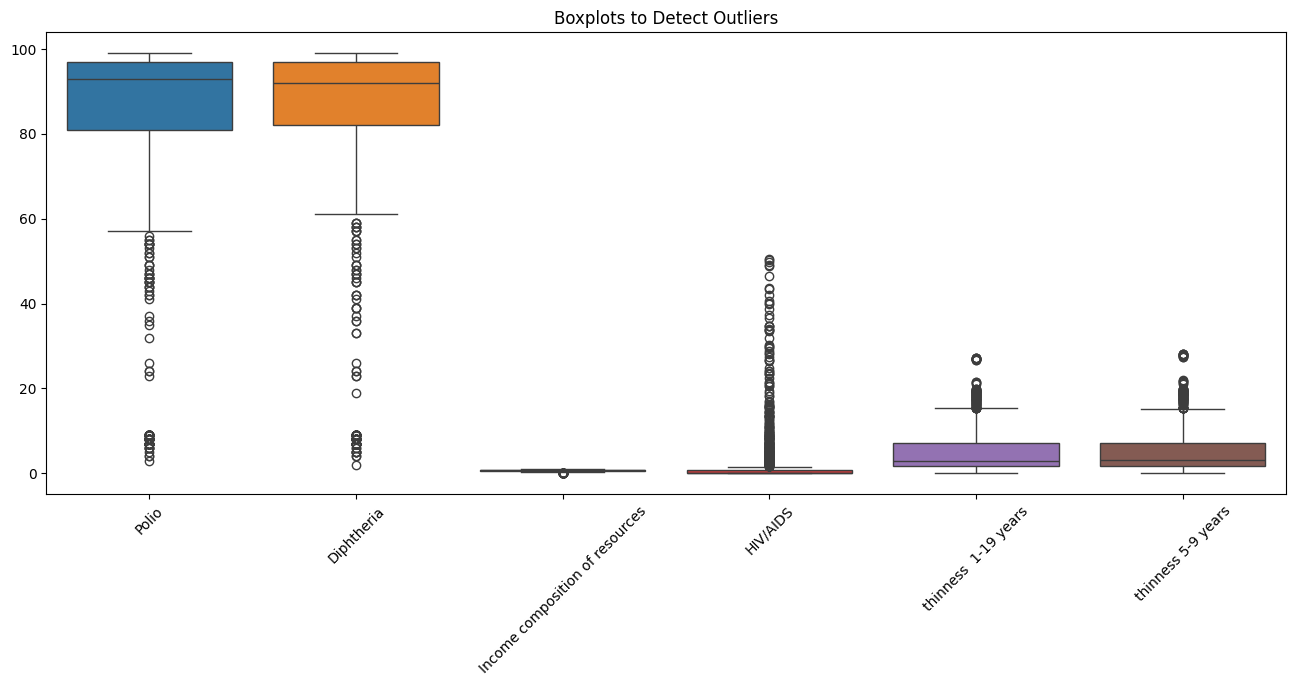

In [97]:
# Visualizing outliers using boxplots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.boxplot(data=df[['Polio', 'Diphtheria', 'Income composition of resources', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years']])
plt.xticks(rotation=45)
plt.title("Boxplots to Detect Outliers")
plt.show()


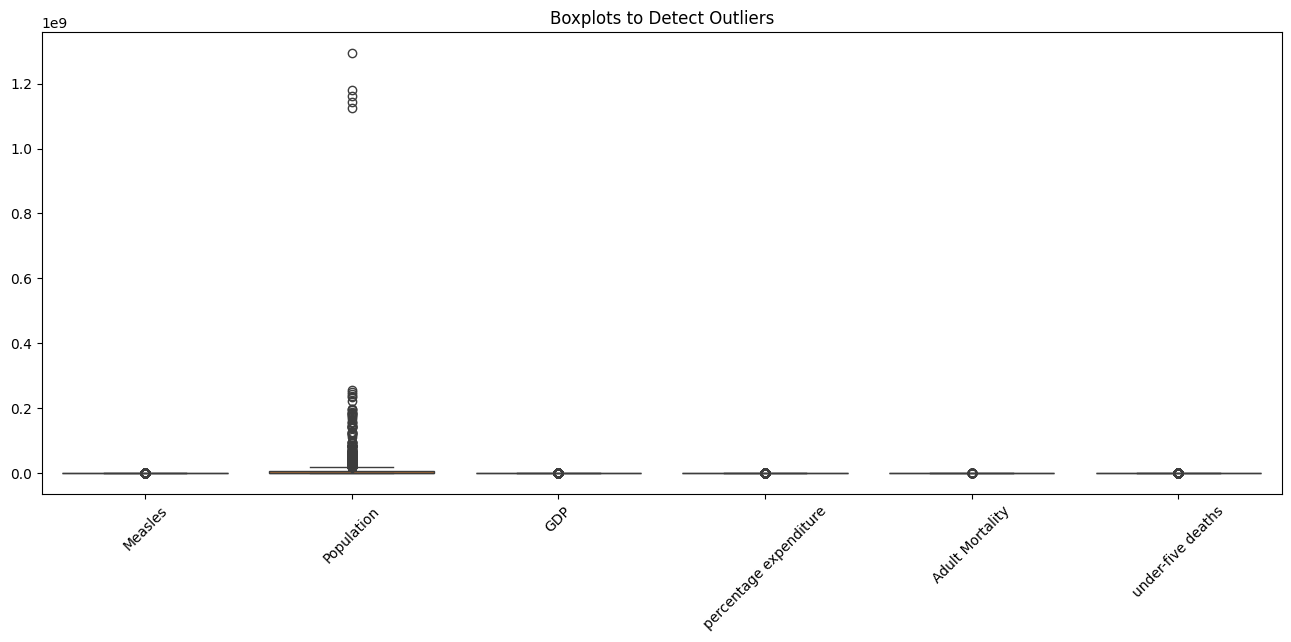

In [98]:
# Visualizing outliers using boxplots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.boxplot(data=df[['Measles', 'Population', 'GDP','percentage expenditure', 'Adult Mortality', 'under-five deaths']])
plt.xticks(rotation=45)
plt.title("Boxplots to Detect Outliers")
plt.show()

In [99]:
# IQR method for outlier detection (Interquartile Range)
outlier_data = []
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

for col in df.select_dtypes(include='number').columns:
    outliers = detect_outliers_iqr(df[col])
    outlier_data.append({
        'Column': col,
        'Outlier Count': len(outliers),
        'Percentage': round((len(outliers) / len(df)) * 100, 2)
    })

# Create DataFrame and sort by outlier count (descending)
outlier_summary = pd.DataFrame(outlier_data)
outlier_summary = outlier_summary.sort_values('Outlier Count', ascending=False)

# Display as a formatted table
print("Outlier Detection Summary")
print("=" * 40)
print(outlier_summary.to_string(index=False))

Outlier Detection Summary
                         Column  Outlier Count  Percentage
                       HIV/AIDS            299       18.13
                        Measles            297       18.01
                     Population            233       14.13
              under-five deaths            222       13.46
                            GDP            208       12.61
                  infant deaths            199       12.07
         percentage expenditure            187       11.34
                    Hepatitis B            165       10.01
                          Polio            142        8.61
                     Diphtheria            134        8.13
             thinness 5-9 years             78        4.73
           thinness  1-19 years             77        4.67
                Adult Mortality             54        3.27
Income composition of resources             48        2.91
                Life expectancy             39        2.37
                      Schoolin

### Implementation of Data handling 

In [ ]:
# Define feature categories
health_indicators = [
    'Adult Mortality', 'infant deaths', 'under-five deaths',
    'BMI', 'thinness  1-19 years', 'thinness 5-9 years'
]

socioeconomic = ['GDP', 'Income composition of resources']
demographic = ['Population']
healthcare = ['Polio', 'Diphtheria', 'Hepatitis B', 'Total expenditure']
disease_prevalence = ['Measles', 'HIV/AIDS']

# --- Helper Functions ---

def winsorize_series(series, limits=(0.01, 0.01)):
    return pd.Series(winsorize(series, limits=limits), index=series.index)

def percentile_cap(series, lower=0.01, upper=0.99):
    return series.clip(series.quantile(lower), series.quantile(upper))

def iqr_cap(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

def log_transform(series):
    return np.log1p(series.clip(lower=0))  # avoid log(0)

# --- Apply Handling Strategy per Category ---

# 1. Health Indicators → Winsorization
for col in health_indicators:
    if col in df.columns:
        df[col] = winsorize_series(df[col])

# 2. Socioeconomic → Log transformation + Imputation (MICE)
for col in socioeconomic:
    if col in df.columns:
        df[col] = log_transform(df[col])
        
# MICE Imputation for socioeconomic columns
imputer = IterativeImputer(random_state=0)
df[socioeconomic] = imputer.fit_transform(df[socioeconomic])

# 3. Demographic → Percentile-based capping
for col in demographic:
    if col in df.columns:
        df[col] = percentile_cap(df[col])

# 4. Healthcare Factors → IQR-based capping
for col in healthcare:
    if col in df.columns:
        df[col] = iqr_cap(df[col])

# 5. Disease Prevalence → Percentile-based capping
for col in disease_prevalence:
    if col in df.columns:
        df[col] = percentile_cap(df[col])

# ✅ Cleaned dataset is now ready
print(df.head())


       Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0              263   
1  Afghanistan  2014  Developing             59.9              271   
2  Afghanistan  2013  Developing             59.9              268   
3  Afghanistan  2012  Developing             59.5              272   
4  Afghanistan  2011  Developing             59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  \
0             62     0.01               71.279624           65     1154  19.1   
1             64     0.01               73.523582           62      492  18.6   
2             66     0.01               73.219243           64      430  18.1   
3             69     0.01               78.184215           67     2787  17.6   
4             71     0.01                7.097109           68     3013  17.2   

   under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0                 83

C:\Users\K RAHIM\AppData\Local\Temp\ipykernel_24644\3277078336.py:20: FutureWarning:

Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



### Task 3: Apply Chosen Method and Evaluate

In [101]:
numeric_columns = df.select_dtypes(include = 'number')
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [102]:
nonNumericColumns = df.select_dtypes(include = 'object')
for column in nonNumericColumns.columns:
    df[column].fillna(df[column].mode()[0])
    
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### Task 4: Identify Potential Features

In [103]:
# Display all columns in the DataFrame
pd.set_option('display.max_columns', None)
#Description of the dataset transposed
df.describe(include='all')

c:\xampp\htdocs\Life_Expectancy\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning:


c:\xampp\htdocs\Life_Expectancy\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning:


c:\xampp\htdocs\Life_Expectancy\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning:


c:\xampp\htdocs\Life_Expectancy\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning:


c:\xampp\htdocs\Life_Expectancy\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning:


c:\xampp\htdocs\Life_Expectancy\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning:




,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649,1649.000000,1649,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
unique,133,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,1407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.840509,NaN,69.302304,167.654942,27.500910,4.533196,698.973558,82.018799,1921.590055,38.112492,38.311704,86.794421,5.951340,87.292298,1.899576,7.319928,1.139680e+07,4.799879,4.861249,0.482420,12.119891
std,NaN,4.087711,NaN,8.796834,123.064384,74.982418,4.029189,1759.229336,18.574411,7362.489124,19.719948,108.606223,13.173951,2.285542,12.283455,5.467259,1.745151,2.847646e+07,4.390919,4.454806,0.123436,2.795388
min,NaN,2000.000000,NaN,44.000000,3.000000,0.000000,0.010000,0.000000,41.000000,0.000000,2.300000,0.000000,57.000000,0.740000,59.500000,0.100000,0.986320,3.888400e+02,0.100000,0.100000,0.000000,4.200000
25%,NaN,2005.000000,NaN,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,6.138050,1.918970e+05,1.600000,1.700000,0.411447,10.300000
50%,NaN,2008.000000,NaN,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,7.373733,1.419631e+06,3.000000,3.200000,0.514618,12.300000
75%,NaN,2011.000000,NaN,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,8.459461,7.658972e+06,7.100000,7.100000,0.560187,14.000000


###  Task 5: Feature Engineering

In [104]:
df['Health Spending Ratio'] = df['Total expenditure'] / df['GDP']
df['Deaths per Infant'] = df['infant deaths'] / df['Population']

### Task 6: Impact of New Features

In [105]:
df[['Health Spending Ratio', 'Deaths per Infant']].describe()

,Health Spending Ratio,Deaths per Infant
count,1649.000000,1.649000e+03
mean,0.860576,3.517057e-04
std,0.408478,8.218733e-03
min,0.109191,0.000000e+00
25%,0.607221,4.399810e-08
50%,0.811853,1.360133e-06
75%,1.044948,1.178474e-05
max,4.037042,3.286604e-01


### Task 7: Select Key Variables for Visualization

In [106]:
df[['Life expectancy', 'GDP', 'Schooling', 'Alcohol', 'BMI', 'HIV/AIDS']].corr()

,Life expectancy,GDP,Schooling,Alcohol,BMI,HIV/AIDS
Life expectancy,1.000000,0.533383,0.727630,0.402718,0.543070,-0.613943
GDP,0.533383,1.000000,0.603063,0.469679,0.402712,-0.154391
Schooling,0.727630,0.603063,1.000000,0.616975,0.555653,-0.220278
Alcohol,0.402718,0.469679,0.616975,1.000000,0.354913,-0.032604
BMI,0.543070,0.402712,0.555653,0.354913,1.000000,-0.223802
HIV/AIDS,-0.613943,-0.154391,-0.220278,-0.032604,-0.223802,1.000000


### Task 8: Visualizations

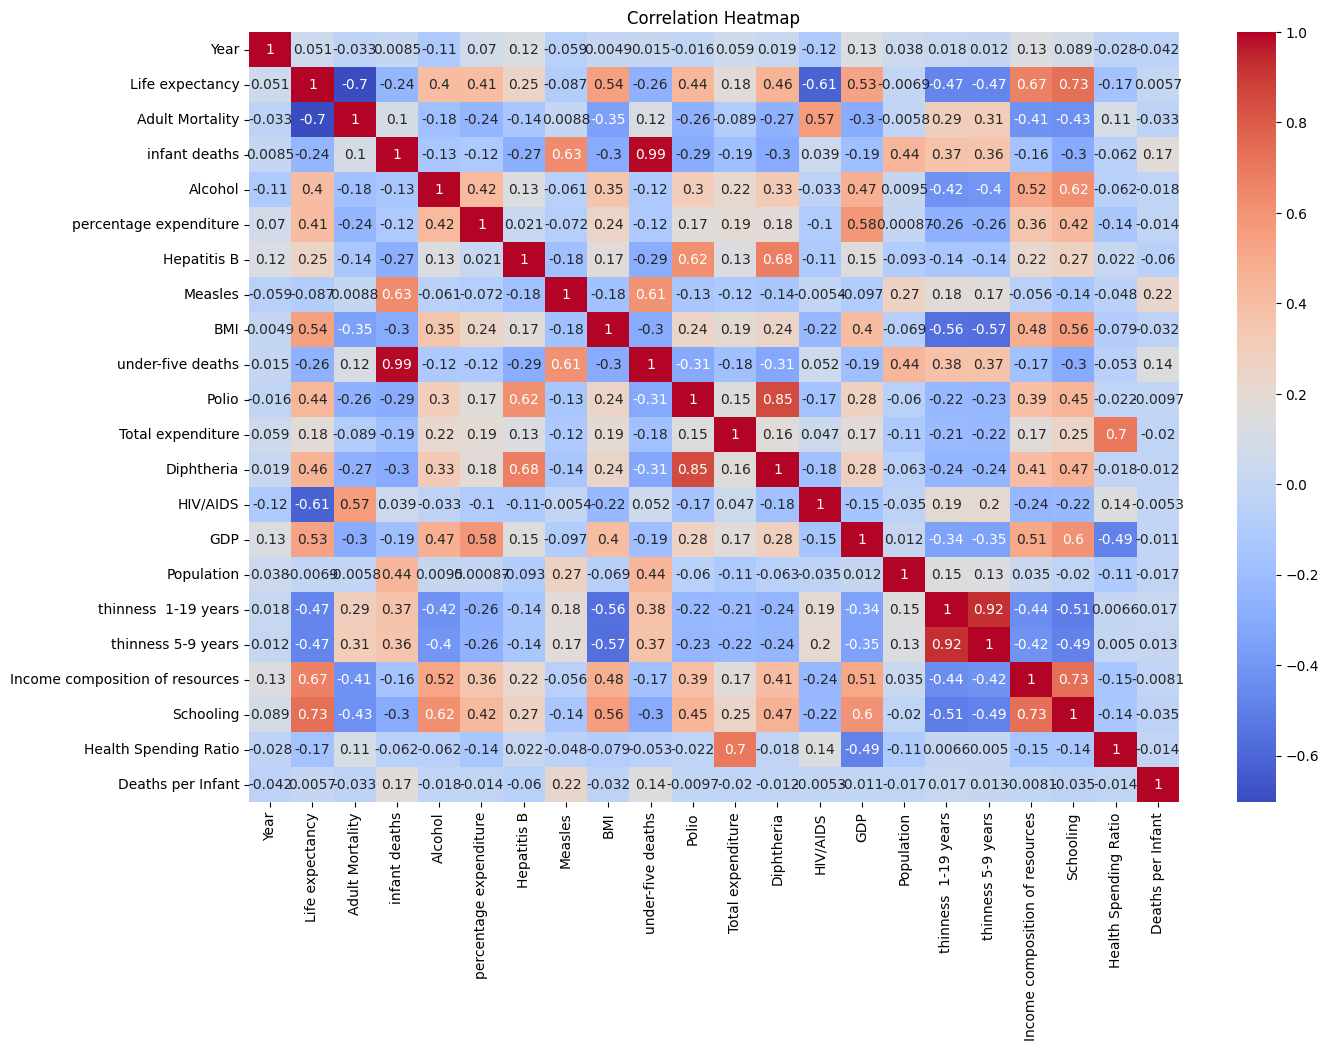

In [107]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

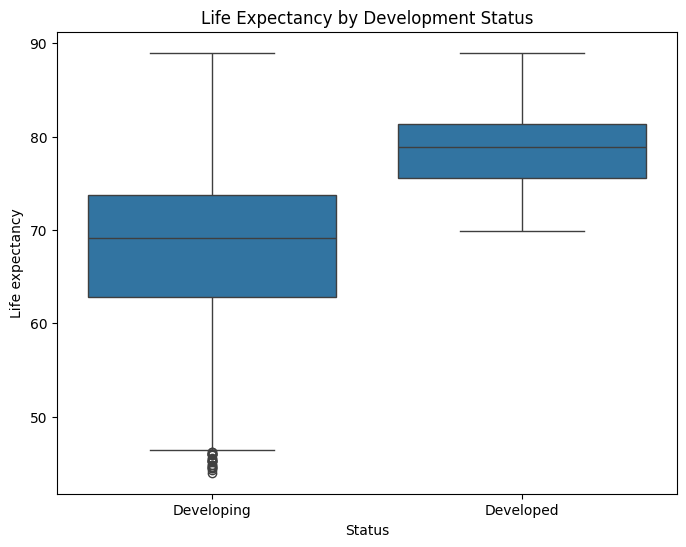

In [108]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Status', y='Life expectancy', data=df)
plt.title('Life Expectancy by Development Status')
plt.show()

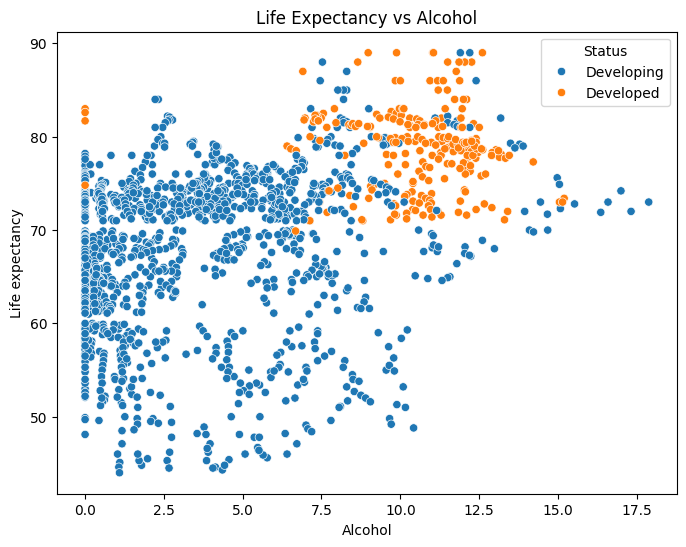

In [109]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Alcohol', y='Life expectancy', hue='Status')
plt.title('Life Expectancy vs Alcohol')
plt.show()

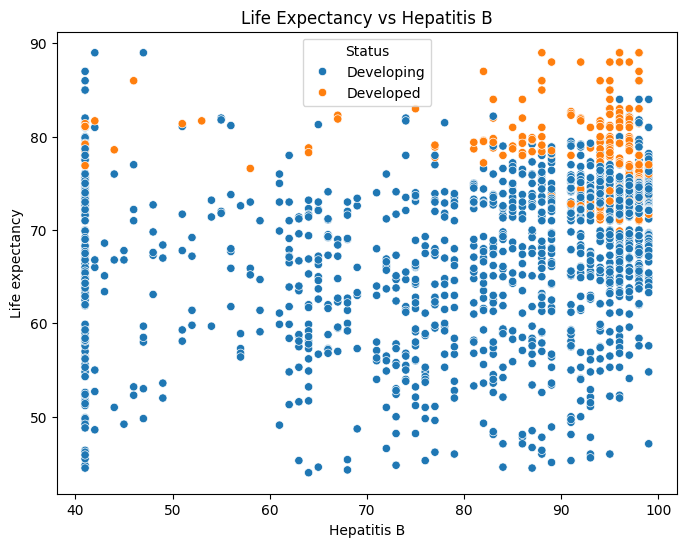

In [110]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Hepatitis B', y='Life expectancy', hue='Status')
plt.title('Life Expectancy vs Hepatitis B')
plt.show()

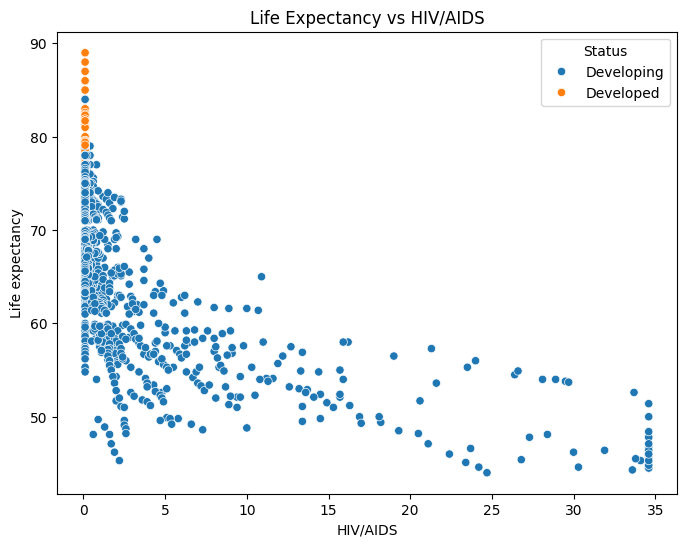

In [111]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='HIV/AIDS', y='Life expectancy', hue='Status')
plt.title('Life Expectancy vs HIV/AIDS')
plt.show()

In [112]:
# 3D Plot
fig = px.scatter_3d(df, x='GDP', y='Schooling', z='Life expectancy',
                     color='Status', size='Population')
fig.show()

### Task 9: Interpretation
- Higher GDP and schooling are associated with higher life expectancy.
- Developing countries tend to have more outliers and lower average life expectancy.
- HIV/AIDS has a strong negative correlation with life expectancy.

### Task 10: Data Splitting and Model Training

In [113]:
features = ['GDP', 'Schooling', 'Alcohol', 'BMI', 'HIV/AIDS']
X = df[features]
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

### Task 11: Cross Validation and Model Evaluation

In [114]:
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
cross_val = cross_val_score(model, X, y, cv=5).mean()
mae, r2, cross_val

(3.4265866934219598, 0.7329298690587238, np.float64(0.7365358298842359))

### Task 12: Conclusion and Recommendations
- **Key Findings**: Life expectancy is positively influenced by GDP, schooling, and healthcare access. HIV/AIDS is a major negative predictor.
- **Model Performance**: The linear model gives reasonable accuracy with cross-validation.
- **Recommendation**: Focus on improving education, economic stability, and healthcare to raise life expectancy.